In [1]:
from PIL import Image, ImageFont, ImageDraw
from pilmoji import Pilmoji
from pilmoji.source import EmojiCDNSource
import numpy as np
import pickle

In [37]:
def create_data(emojis, save_as=None, disp=True):
    """
    Create an dict containing all data to draw N 
    different emojis (which are specified in the
    first parameter of function). Structure of dict: 
    {
        'emojis': list of N emojis of str type,
        'styles': dict of 4 style names {number: stylename},
        'matrices': np-array with shape (4, N, 128, 128, 4) of uint8,
        'averages': np-array with shape (4, N, 3) of float,
        'areas': np-array with shape (4, N) of float
    }

    PARAMETERS
    ----------
    emojis : list[str]
        list of emojis to build data

    save_as : str or None
        path to save data. If None is specified, data
        will not be saved
    
    disp : bool
        | toggle progress displaing
    """
    
    def _str2style(name):
        """to convert style name to style class"""
        class StyleClass(EmojiCDNSource):
            STYLE = name
        return StyleClass
        
    # Quantity of emojis
    n_emojis = len(emojis)

    # Size of image with emoji
    esize = (128, 128)
    
    data_dict = {
        'emojis': emojis,
        'styles': {0: 'twitter', 
                   1: 'apple', 
                   2: 'google', 
                   3: 'facebook'},
        'matrices': np.zeros((4, n_emojis, *esize, 4), 
                             dtype='uint8'),
        'averages': np.zeros((4, n_emojis, 3)),
        'areas': np.zeros((4, n_emojis))
    }

    # Style classes
    styles = [_str2style(data_dict['styles'][i]) for i in range(4)]

    for i, emoji in enumerate(emojis):
        for j, style in enumerate(styles):
            # Drawing an emoji on empty (0, 0, 0, 0) RGBA image
            with Image.new('RGBA', esize, 0) as image:
                font = ImageFont.truetype('arial.ttf', esize[0])
                with Pilmoji(image, source=style) as pilmoji:
                    pilmoji.text((0, 0), emoji, font=font)
            # RGBA-matrix
            image_np = np.array(image)
            data_dict['matrices'][j, i] = image_np#.astype('uint8')
            
            # Area occupied by an emoji
            alphas = image_np[..., 3:] / 255
            data_dict['areas'][j, i] = alphas.sum() / np.prod(esize)

            # Average color of emoji
            weighted_sum = (image_np[:, :, :3] * alphas).sum(axis=(0, 1))
            data_dict['averages'][j, i] =  weighted_sum / alphas.sum()
            
            # Displaing the progress
            if disp:
                total = n_emojis * 4
                current = i * 4 + j + 1
                progress = f'{round(current / total * 100, 2)}%'
                print(f'\r{progress:<6} ({i+1}/{len(emojis)})', end='')
    if disp:
        print()

    # Saving as binary pickle file
    if save_as is not None:
        with open(f'{save_as}.pkl', 'bw') as file:
            pickle.dump(data_dict, file)

    return data_dict

In [3]:
def load_emoji_list(list_name):
    with open(f'{list_name}.txt', 'r') as file:
        emoji_list = [line.strip() for line in file]
    return emoji_list

In [36]:
# moon colors love food flags all_flags classic

In [ ]:
%%time
name = 'classic'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

In [ ]:
%%time
name = 'all_flags'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

In [ ]:
%%time
name = 'flags'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

In [54]:
%%time
name = 'food'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

100.0% (115/115)
CPU times: user 22.6 s, sys: 1.31 s, total: 23.9 s
Wall time: 9min 47s


In [53]:
%%time
name = 'love'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

100.0% (29/29)
CPU times: user 5.55 s, sys: 253 ms, total: 5.8 s
Wall time: 2min 17s


In [52]:
%%time
name = 'colors'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

100.0% (30/30)
CPU times: user 5.76 s, sys: 268 ms, total: 6.03 s
Wall time: 2min 29s


In [51]:
%%time
name = 'moon'
exec(f'{name} = create_data(load_emoji_list("lists/{name}"), "{name}")')

100.0% (8/8)
CPU times: user 1.56 s, sys: 86.8 ms, total: 1.65 s
Wall time: 24.2 s


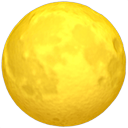

In [50]:
Image.fromarray(moon['matrices'][1, 0])